In [1]:
import omnipath as op
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pySankey import sankey as sn
import mellon as ml
import networkx as nx
from matplotlib.pyplot import figure
import glob
import netrd
import itertools


c:\Users\melis\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [101]:
path = glob.glob("processed_data/hot-encoded-diseases_*.csv")
reslist = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7']
for res in range(0,len(path)):
    db = op.interactions.import_intercell_network(transmitter_params = {"categories":"ligand"}, receiver_params = {"categories": "receptor"})
    print(np.shape(db))
    db = db[np.logical_not(db['genesymbol_intercell_source'].str.startswith('HLA'))]
    db = db[np.logical_not(db['genesymbol_intercell_target'].str.startswith('HLA'))]
    db = db[~db['genesymbol_intercell_target'].astype(str).str.startswith('COMPLEX')]
    db = db[~db['genesymbol_intercell_source'].astype(str).str.startswith('COMPLEX')]
    print(np.shape(db))
    tgts_all = pd.read_csv(path[res])
    tgts_all['gene']=tgts_all['genes']
    tgts = tgts_all.drop(columns=['genes']).set_index(['gene'])

    source, percSrc, targets, percTgt, sum = ml.lr.find_hits(tgts, db)
    network = pd.read_csv('processed_data/03-LR_network_visualisation/louvain_largest_cluster_%s.csv' % reslist[res], index_col = 0)
    dis_tgts = tgts.loc[list(set(list(network['0'])) & set(list(tgts.index)))]
    dis_tgts.to_csv('processed_data/03-LR_network_visualisation/03f_diseases_in_networks/targets_and_diseases_network_%s.csv' % reslist[res])
    if (res == 0):
        summary = pd.DataFrame(dis_tgts.sum())
        summary_perc = summary/len(list(network['0']))
        genes_across = pd.DataFrame(dis_tgts.sum(axis = 1))
    else: 
        summary = summary.merge(pd.DataFrame(dis_tgts.sum().rename(reslist[res])), left_index=True, right_index=True, how='left')
        summary_perc = summary_perc.merge(pd.DataFrame(dis_tgts.sum().rename(reslist[res]))/len(list(network['0'])), left_index=True, right_index=True, how='left')
        genes_across = genes_across.merge(pd.DataFrame(dis_tgts.sum(axis =1).rename(reslist[res])), left_index=True, right_index=True, how='left')

summary_perc = summary_perc.fillna(0)*100
summary_perc = summary_perc.drop(['Empty'])
summary_perc.to_csv('processed_data/03-LR_network_visualisation/03f_diseases_in_networks/targets_and_diseases_summary_perc.csv')
summary = summary.fillna(0)
summary = summary.drop(['Empty'])
summary.to_csv('processed_data/03-LR_network_visualisation/03f_diseases_in_networks/targets_and_diseases_summary_total.csv')
genes_across = genes_across.fillna(0)
genes_across.to_csv('processed_data/03-LR_network_visualisation/03f_diseases_in_networks/network_targets_summary_across_thresholds.csv')

(9708, 45)
(8345, 45)
(9708, 45)
(8345, 45)
(9708, 45)
(8345, 45)
(9708, 45)
(8345, 45)
(9708, 45)
(8345, 45)
(9708, 45)
(8345, 45)
(9708, 45)
(8345, 45)


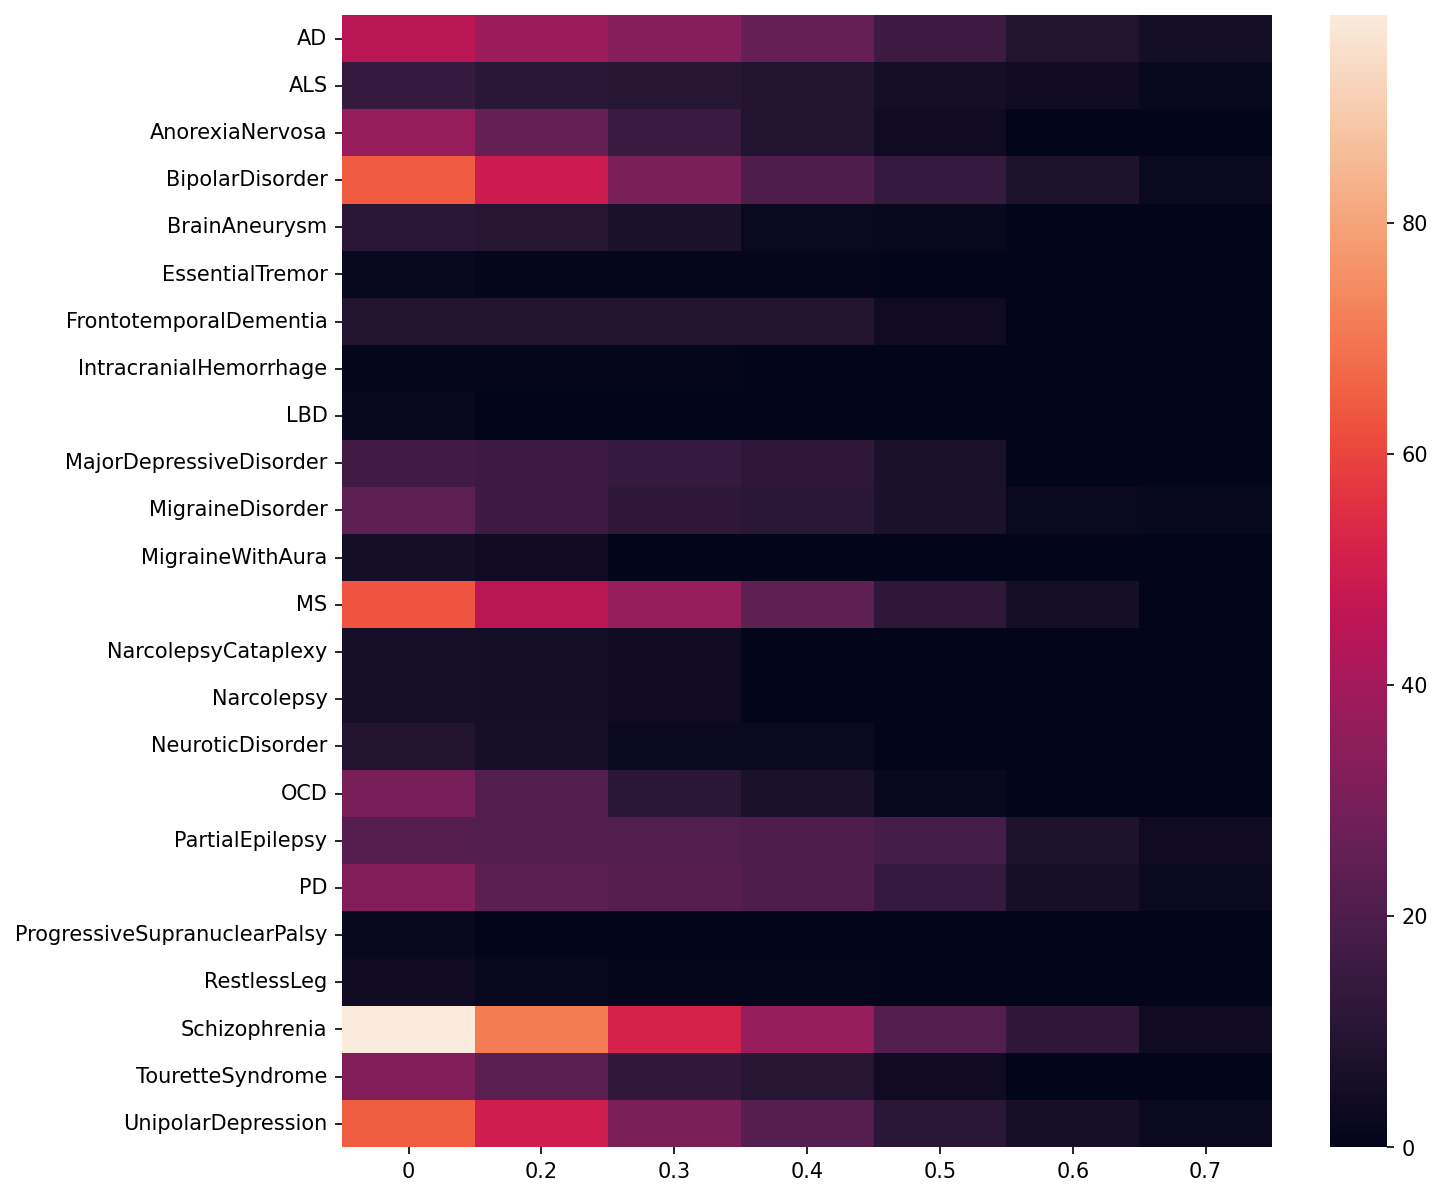

In [102]:
plt.figure(figsize=(10,10), dpi = 150)
sns.heatmap(summary.fillna(0))
plt.savefig('plots/03-LR_network_visualisation/03f_diseases_in_networks/total_disease_contribution.png')
plt.show()

<Figure size 1500x1500 with 0 Axes>

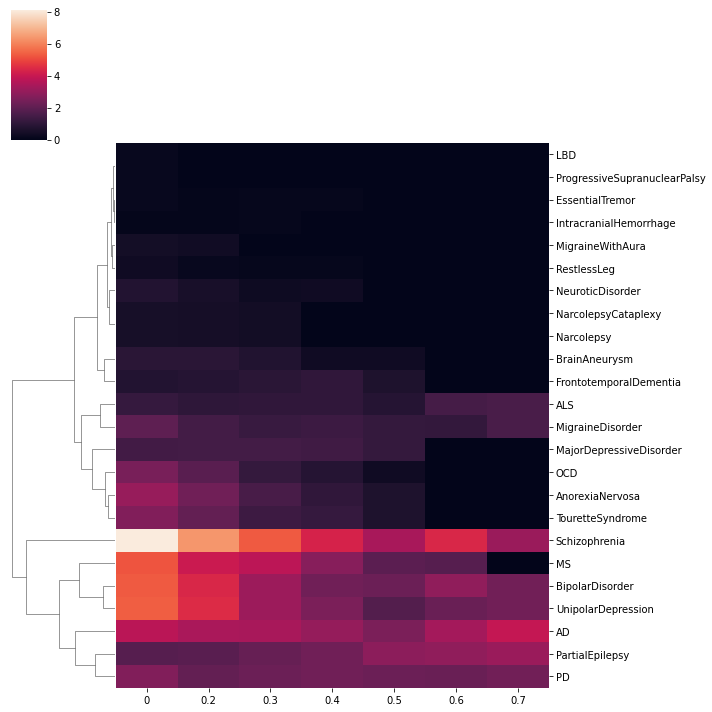

In [103]:
plt.figure(figsize=(10,10), dpi = 150)

sns.clustermap(summary_perc.fillna(0), col_cluster = False)
plt.savefig('plots/03-LR_network_visualisation/03f_diseases_in_networks/percentage_disease_contribution.png')
plt.show()

<Figure size 9000x9000 with 0 Axes>

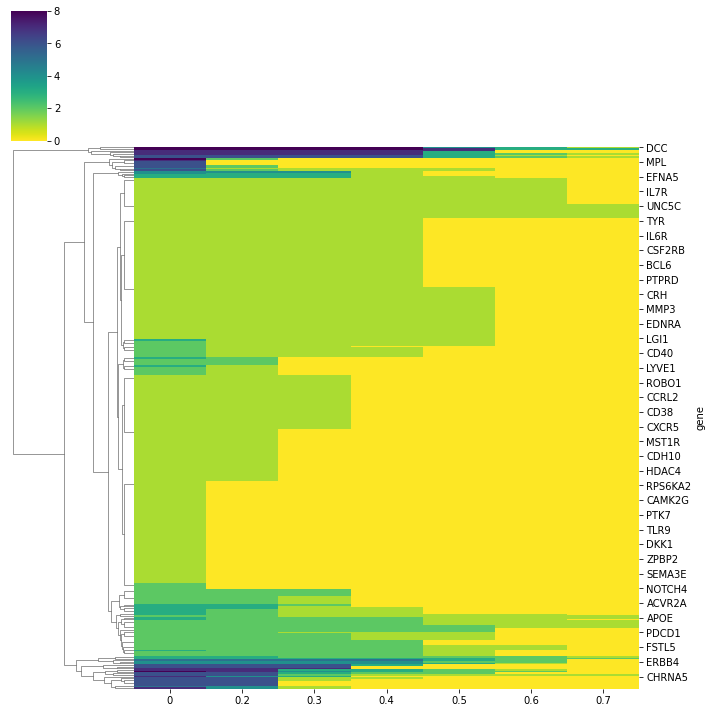

In [104]:
plt.figure(figsize=(30,30), dpi = 300)
sns.clustermap(genes_across, col_cluster = False, cmap = 'viridis_r')
plt.savefig('plots/03-LR_network_visualisation/03f_diseases_in_networks/genes_withdiseases_acrosshtresholds.png')
plt.show()

In [55]:
dis_tgts.loc['VRK2']

AD                    0.0
ALS                   0.0
BipolarDisorder       1.0
MigraineDisorder      0.0
PartialEpilepsy       0.0
PD                    0.0
Schizophrenia         1.0
UnipolarDepression    1.0
Empty                 0.0
Name: VRK2, dtype: float64

In [97]:
dis_tgts

,AD,ALS,BipolarDisorder,MigraineDisorder,PartialEpilepsy,PD,Schizophrenia,UnipolarDepression,Empty
gene,,,,,,,,,
PLA2G6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
TUBA4A,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
APOE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
SCN2A,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
SCN9A,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
SCN1A,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
APP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
RELN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
TBK1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
